# 1. 先用預訓練好的神經網路提取影片特徵

In [1]:
import cv2
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

In [2]:
import tensorflow as tf
# 设置 TensorFlow 使用 GPU
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# VGG16 model，只做到特徵提取
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

In [4]:
# Load dataset
dataset_dir = './dataset_aug'

dataset = []
for category in os.listdir(dataset_dir):
    shape = (1, len(os.listdir(os.path.join(dataset_dir, category))))
    print(shape)

    video_count = 0 # 計算這個類別有幾個影片
    category_path = os.path.join(dataset_dir, category)
    for index, video in enumerate(os.listdir(category_path)):
        video_path = os.path.join(category_path, video)
        if not os.path.isdir(video_path):
            continue

        frames = []
        cnt = -1
        for frame in os.listdir(video_path):
            cnt += 1
            if cnt % 2 != 0:
                continue
            frame_path = os.path.join(video_path, frame)
            img = cv2.imread(frame_path)
            img = np.expand_dims(img, axis=0)  # 拓展維度
            img = preprocess_input(img)  # 預處理
            frames.append(img)

        dataset.append(frames)


(1, 200)
(1, 200)
(1, 200)
(1, 200)
(1, 200)
(1, 200)


In [5]:
# 提取特徵
print(len(dataset))
dataset = np.array(dataset)
print(dataset.shape)

videos_features = []
for data in dataset:
    features = []
    for frame in data:
        print(frame.shape)
        feature = model.predict(frame)
        features.append(feature)
    videos_features.append(np.concatenate(features, axis=0))
    print(len(videos_features))


1200
(1200, 15, 1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
1
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
2
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
3
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
(1, 90, 160, 3)
4
(

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [7]:
data = np.array(videos_features)
print(data.shape)
X = data.reshape((data.shape[0], -1))
print(X.shape)

(1200, 15, 5, 10, 512)
(1200, 384000)


In [8]:
pca = PCA(n_components=50)
X = pca.fit_transform(X)
print(X.shape)

(1200, 50)


In [9]:
kmeans = KMeans(n_clusters=36)
kmeans.fit(X)
Y = kmeans.labels_

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('result/k-means/output.png')

In [11]:
def retrieve_info(cluster_labels, y_train):
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(Y))):
        index = np.where(cluster_labels == i)[0]  # 获取簇 i 的索引
        if len(index) > 0:
            num = np.bincount(y_train[index]).argmax()  # 计算簇 i 中标签的众数
            reference_labels[i] = num
        else:
            reference_labels[i] = -1  # 处理簇中没有样本的情况
    return reference_labels

In [12]:
# y_test = [0]*39 + [1]*36 + [2]*33 + [3]*36 + [4]*44 + [5]*46
y_test = [0]*200 + [1]*200 + [2]*200 + [3]*200 + [4]*200 + [5]*200
y_test = np.array(y_test)
reference_labels = retrieve_info(Y, y_test)
number_labels = np.random.rand(len(Y))
for i in range(len(Y)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

accuracy score: 0.3625 

[[68 36 32  4  6 54]
 [ 7 89 24 47 11 22]
 [38 37 57 20  8 40]
 [11 59 19 84 11 16]
 [31 40 22 30 48 29]
 [46 24 20 15  6 89]]
Confusion matrix, without normalization
[[68 36 32  4  6 54]
 [ 7 89 24 47 11 22]
 [38 37 57 20  8 40]
 [11 59 19 84 11 16]
 [31 40 22 30 48 29]
 [46 24 20 15  6 89]]


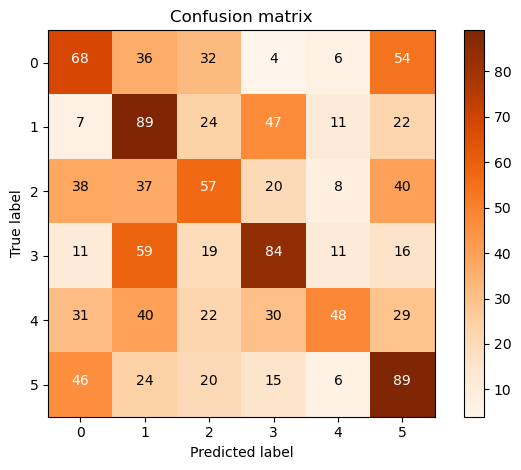

In [13]:
cnf_matrix_sklearn = confusion_matrix(y_test, number_labels)
acc = accuracy_score(y_test, number_labels)
print("accuracy score:", acc, '\n')
print(cnf_matrix_sklearn)
plot_confusion_matrix(cnf_matrix_sklearn, [0, 1, 2, 3, 4, 5], normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges)